In [1]:
import torch
import torchvision
from torch.utils.data import Dataset
import numpy as np

In [2]:
class WDataset(Dataset):
    def __init__(self,dpath,transform=None):
        data=np.loadtxt(dpath,delimiter=',',dtype=np.float32,skiprows=1)
        
        self.x=data[:,1:]
        self.y=data[:,0]
        self.n_sample=data.shape[0]
        self.transform=transform

    def __getitem__(self,index):
        sample=self.x[index],self.y[index]
        if self.transform !=None:
            sample=self.transform(sample)
        return sample
    
    def __len__(self):
        return self.n_sample
    

class ToTensor:  
    def __call__(self,sample):
        inputs,labels=sample
        return torch.tensor(inputs),torch.tensor(labels)
    
#Multiplication Transform
    
class MultTransform:
    def __init__(self, factor):
        self.factor=factor
    
    def __call__(self,sample):
        input,target=sample
        input*=self.factor
        return input,target
    
dataset=WDataset('wine.csv',transform=None)
firstdata=dataset[0]

features,labels=firstdata
print(type(features),type(labels))


<class 'numpy.ndarray'> <class 'numpy.float32'>


In [3]:
#Applying a composed transform

composed=torchvision.transforms.Compose([ToTensor(),MultTransform(2)])

dataset=WDataset('wine.csv',transform=composed)
firstdata=dataset[0]

features,labels=firstdata
print(type(features),type(labels))
print(features)
print(labels)


<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([2.8460e+01, 3.4200e+00, 4.8600e+00, 3.1200e+01, 2.5400e+02, 5.6000e+00,
        6.1200e+00, 5.6000e-01, 4.5800e+00, 1.1280e+01, 2.0800e+00, 7.8400e+00,
        2.1300e+03])
tensor(1.)


Loss Evaluation: Softmax<br/>
<img src="images/softmax.png" width="250" height="180"> <br/>
Softmax Applies the exponential function to each element and normalizes by the sum of exponentials of all element. It squashes the output to be within  0 and 1 and hence we get probability values.

In [4]:
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x),axis=0)

x=np.array([0.2,1.0,3.0])
y=softmax(x)
print("Softmax Outputs:", y)

Softmax Outputs: [0.05083836 0.11314284 0.8360188 ]


<h2>Cross Entropy Loss</h2><br/>
<img src="images/loss.png" height=100 width=300>

In [5]:
#Cross Entropy using numpy
def cross_entropy(actual,predicted):
    loss=-np.sum(actual*np.log(predicted))
    return loss

In [6]:
Y=np.array([1,0,0])  # one hot encoded label

Y_predicted_bad=np.array([0.3,0.4,0.3])
Y_predicted_good=np.array([0.8,0.1,0.1])

loss_evaluate=cross_entropy(Y,Y_predicted_bad)
print("Predicted Bad Loss:",loss_evaluate)

loss_evaluate=cross_entropy(Y,Y_predicted_good)
print("Predicted good Loss:",loss_evaluate)


Predicted Bad Loss: 1.2039728043259361
Predicted good Loss: 0.2231435513142097


In [7]:
#Pytorch crossentropy.
#Warning: The cross entropy loss applies nn.logSoftmax + nn.NLLLoss(Negative log likelihood)
#--> No Softmax in last layer.
#Y has class labels,Not one-hot!
#Y_pred has raw scores(logits.), no Softmax
import torch.nn as nn
loss=nn.CrossEntropyLoss()
Y=torch.tensor([0])
Y_pred_good=torch.tensor([[2.0,1.0,0.1]]) #As softmax is not applied so no probability value
Y_pred_bad=torch.tensor([[0.5,2.0,0.3]])

loss_evaluate=loss(Y_pred_bad,Y)
print("Loss evaluate bad:",loss_evaluate.item())
loss_evaluate=loss(Y_pred_good,Y)
print("Loss evaluate good",loss_evaluate.item())

#To get the actual predictions. Note there are 3 classes

_,predictions1=torch.max(Y_pred_bad,1)
_,predictions2=torch.max(Y_pred_good,1)

print("Predictions Bad:",predictions1.item())
print("Predictions Good",predictions2.item()) #It is actually 0 class

Loss evaluate bad: 1.840616226196289
Loss evaluate good 0.4170299470424652
Predictions Bad: 1
Predictions Good 0


In [8]:
#Loss in Pytorch allows for multiple samples instead of one. Lets try, We will put multiple values in Y 


import torch.nn as nn
loss=nn.CrossEntropyLoss()
Y=torch.tensor([2,0,1])

#Predictions must be n_samples x n_classess
Y_pred_good=torch.tensor([[1.0,1.0,2.1],[2.0,1.0,0.1],[1.0,2.0,1.0]]) #As softmax is not applied so no probability value
Y_pred_bad=torch.tensor([[0.5,2.0,0.3],[0.5,0.1,0.3],[0.5,2.0,0.3]])

loss_evaluate=loss(Y_pred_bad,Y)
print("Loss evaluate bad:",loss_evaluate.item())
loss_evaluate=loss(Y_pred_good,Y)
print("Loss evaluate good",loss_evaluate.item())

#To get the actual predictions. Note there are 3 classes

_,predictions1=torch.max(Y_pred_bad,1)
_,predictions2=torch.max(Y_pred_good,1)

print("Predictions Bad:",predictions1)
print("Predictions Good",predictions2) 

Loss evaluate bad: 1.0977113246917725
Loss evaluate good 0.49291515350341797
Predictions Bad: tensor([1, 0, 1])
Predictions Good tensor([2, 0, 1])


More Activation Functions.
The work of activation function is to apply a non-linear transformation and decide whether a neuron should be activated or not. <br/>
After each layer we use the activation functions.<br/>
Popular Activation functions are: <br/>
a. TanH <br/>
b. Sigmoid <br/>
c. ReLU <br/>
d. Leaky ReLU <br/>
e. Softmax <br/>
f. Step Function<br/>
<img src="images/activation_function.png" height=450 width=650>

Neural Network with Sigmoid is howcased here (nn.Sigmoid)<br/>
We can have nn.Softmax, nn.tanH, nn.LeakyReLU <br/> . Same is present in torch api with torch.Softmax etc.

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self,input_size,hidden_size,num_classess):
        super(MyNeuralNetwork, self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()    # we can 
        self.sigmoid=nn.Sigmoid()
        self.linear2=nn.Linear(hidden_size,num_classess)

    def forward(self,x):
        out= self.linear1(x)
        out=self.relu(out)
        out=self.linear2(out)
        out=nn.sigmoid(out)
        return out
    

model=MyNeuralNetwork(input_size=28*28,hidden_size=5,num_classess=3)
criterion=nn.BCELoss() #This automatically applies softmax activation


<h2> Feedforward Neural Network<h2>

In [11]:
import torch
import torchvision
import torch.nn as nn
import torchvision .transforms as transforms
import matplotlib.pyplot as plt

device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')


cpu


In [15]:
input_size=784 #28*28
hidden_size=100
n_classess=10
n_epochs=2
batch_size=100
learning_rate=0.001

#Importing the MNIST data
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)

In [25]:
examples= iter(train_loader)
samples,labels=next(examples)
print(samples.shape,labels.shape)  # As the batch size is 100 so 100, then 1 means only one channel and the image size is 28x28

torch.Size([100, 1, 28, 28]) torch.Size([100])


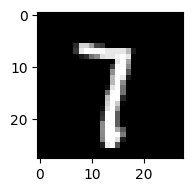

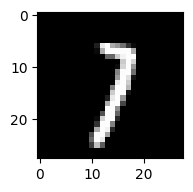

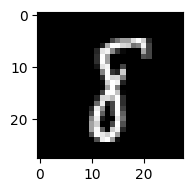

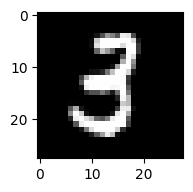

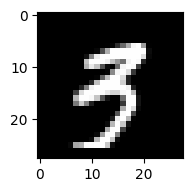

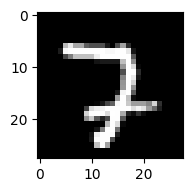

In [28]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0],cmap='gray')
    plt.show()

In [30]:
#Defining the neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size,n_classess):
        super(NeuralNet, self).__init__()
        self.linear1=nn.Linear(input_size,hidden_size)
        self.linear2=nn.Linear(hidden_size,n_classess)
        self.relu=nn.ReLU()
        
    def forward(self,x):
        out=self.linear1(x)
        out=self.relu(out)
        out=self.linear2(out)
        return out

In [38]:
model=NeuralNet(input_size,hidden_size,n_classess)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

#defining the training loop
total_steps=len(train_loader)

#Defining the training loop.
for epoch in range(n_epochs):
    for i,(images,labels) in enumerate(train_loader):
        #reshaping the images first. The images shape is 100*1*28*28
        #As we are using ANN so it needs to be reshaped to 100*784
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)

        #Performing forward pass operation
        y_pred=model.forward(images)
        loss=criterion(y_pred,labels)

        #Performing backward pass- Which is nothing but the weights correction.
        optimizer.zero_grad()  #puting the gradient to zero so that it does adds up
        loss.backward()         #Performing backward weights correction.
        optimizer.step()        #updating the weights in the neural network.

        if(i+1)% 100 ==0:   #printing every 100th step
            print(f'epoch{epoch+1}/{n_epochs},step{i+1}/{total_steps},loss={loss.item():.4f}')

#Defining testing and evaluation

with torch.no_grad():
    n_correct=0
    n_samples=0
    for(images,labels) in test_loader:
        images=images.reshape(-1,28*28).to(device)
        labels=labels.to(device)
        outputs=model.forward(images)
        _, predictions=torch.max(outputs,1)
        n_samples+=labels.shape[0]
        n_correct=(predictions==labels).sum().item()

    acc=100.0*n_correct/n_samples
    print("Accuracy is:",acc)

epoch1/2,step100/600,loss=0.3777
epoch1/2,step200/600,loss=0.3958
epoch1/2,step300/600,loss=0.2248
epoch1/2,step400/600,loss=0.2937
epoch1/2,step500/600,loss=0.1300
epoch1/2,step600/600,loss=0.2698
epoch2/2,step100/600,loss=0.0879
epoch2/2,step200/600,loss=0.2069
epoch2/2,step300/600,loss=0.2759
epoch2/2,step400/600,loss=0.1770
epoch2/2,step500/600,loss=0.1338
epoch2/2,step600/600,loss=0.0989
Accuracy is: 0.94


<h3>Convolutional Neural Network</h3><br/>
<img src='images/conv.png' height=400 width=750>

Predictions on CIFAR Dataset <br/>
https://www.cs.toronto.edu/~kriz/cifar.html

In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision .transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')


n_epochs=4
batch_size=4
learning_rate=0.001


#
#Importing the MNIST data
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=True)